# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | okhotsk
Processing Record 3 of Set 1 | villa azueta
Processing Record 4 of Set 1 | akureyri
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | matoury
Processing Record 12 of Set 1 | lago da pedra
Processing Record 13 of Set 1 | victoria point
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | yellowknife
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,23.73,87,45,4.66,GQ,1693186452
1,okhotsk,59.3833,143.3000,21.72,52,14,5.41,RU,1693186452
2,villa azueta,18.1333,-95.6667,25.04,91,8,2.08,MX,1693186453
3,akureyri,65.6835,-18.0878,12.96,58,0,4.63,IS,1693186453
4,san patricio,28.0170,-97.5169,32.05,48,0,3.62,US,1693186454


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,23.73,87,45,4.66,GQ,1693186452
1,okhotsk,59.3833,143.3000,21.72,52,14,5.41,RU,1693186452
2,villa azueta,18.1333,-95.6667,25.04,91,8,2.08,MX,1693186453
3,akureyri,65.6835,-18.0878,12.96,58,0,4.63,IS,1693186453
4,san patricio,28.0170,-97.5169,32.05,48,0,3.62,US,1693186454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

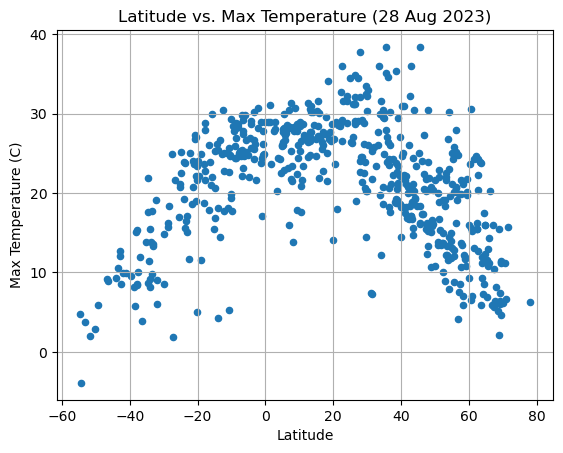

In [25]:
# Build scatter plot for latitude vs. temperature
lat_temp = city_data_df.plot(
    kind="scatter", x="Lat", y="Max Temp", title="Latitude vs. Max Temperature (28 Aug 2023)")

# Incorporate the other graph properties
lat_temp.set_xlabel("Latitude")
lat_temp.set_ylabel("Max Temperature (C)")
lat_temp.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

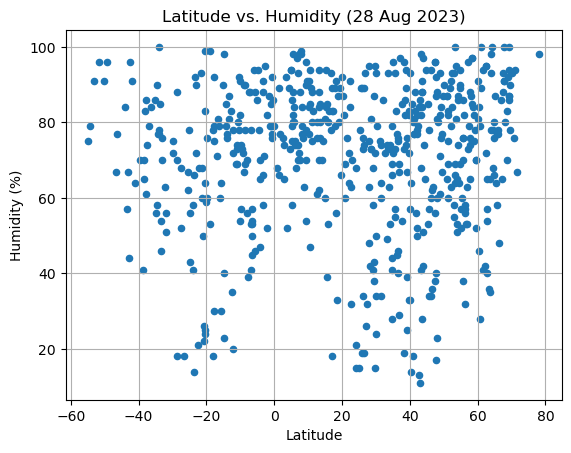

In [26]:
# Build the scatter plots for latitude vs. humidity
lat_humid = city_data_df.plot(
    kind="scatter", x="Lat", y="Humidity", title="Latitude vs. Humidity (28 Aug 2023)")

# Incorporate the other graph properties
lat_humid.set_xlabel("Latitude")
lat_humid.set_ylabel("Humidity (%)")
lat_humid.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

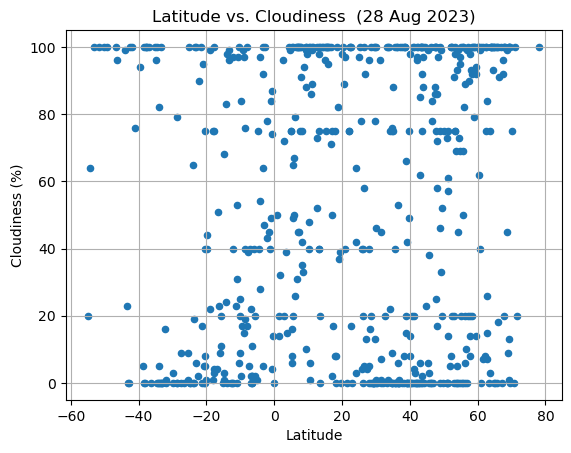

In [27]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud = city_data_df.plot(
    kind="scatter", x="Lat", y="Cloudiness", title="Latitude vs. Cloudiness  (28 Aug 2023)")

# Incorporate the other graph properties
lat_cloud.set_xlabel("Latitude")
lat_cloud.set_ylabel("Cloudiness (%)")
lat_cloud.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

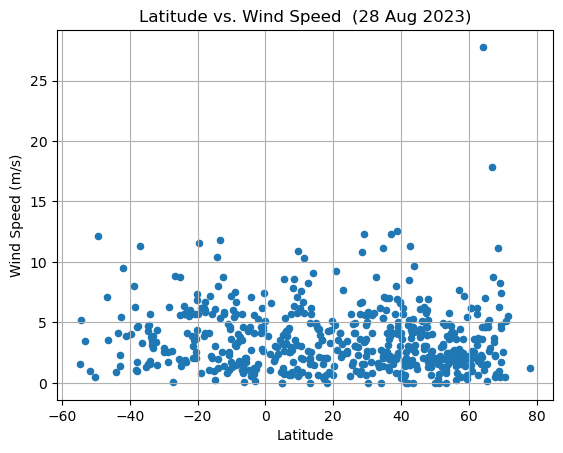

In [28]:
# Build the scatter plots for latitude vs. wind speed
lat_wind = city_data_df.plot(
    kind="scatter", x="Lat", y="Wind Speed", title="Latitude vs. Wind Speed  (28 Aug 2023)")

# Incorporate the other graph properties
lat_wind.set_xlabel("Latitude")
lat_wind.set_ylabel("Wind Speed (m/s)")
lat_wind.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreg_plot(ax_object, x_values, y_values, x_coord, y_coord):
    # Calculate linear regression for x- and y-values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values and equation
    regression_values = x_values * slope + intercept
    line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Calculate the r-value
    print(f"The r-value is: {rvalue**2}")
    
    # Plot linear regression
    ax_object.plot(x_values, regression_values, color="red")
    ax_object.annotate(line_equation, xy=(x_coord, y_coord), xycoords='figure points', fontsize=15, color='red', weight='bold')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,okhotsk,59.3833,143.3000,21.72,52,14,5.41,RU,1693186452
2,villa azueta,18.1333,-95.6667,25.04,91,8,2.08,MX,1693186453
3,akureyri,65.6835,-18.0878,12.96,58,0,4.63,IS,1693186453
4,san patricio,28.0170,-97.5169,32.05,48,0,3.62,US,1693186454
6,stanley,54.8680,-1.6985,11.82,89,0,4.12,GB,1693186418


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,23.73,87,45,4.66,GQ,1693186452
5,grytviken,-54.2811,-36.5092,-3.92,79,64,5.24,GS,1693186454
7,puerto ayora,-0.7393,-90.3518,24.75,92,87,2.68,EC,1693186455
8,port-aux-francais,-49.3500,70.2167,5.89,96,100,12.12,TF,1693186455
10,lago da pedra,-4.3333,-45.1667,25.67,65,28,2.69,BR,1693186456


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4383747678044944


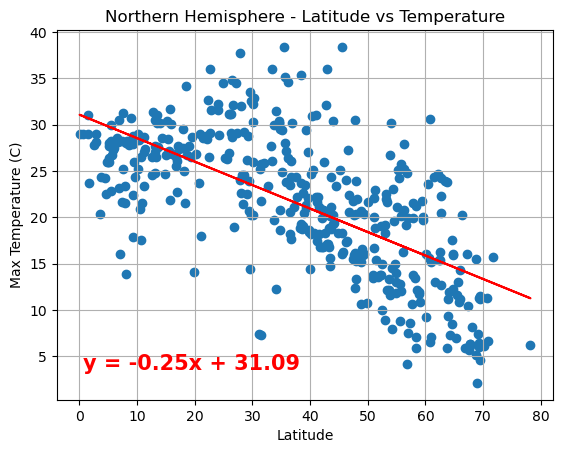

In [15]:
# Linear regression on Northern Hemisphere
x_north_temp = northern_hemi_df['Lat']
y_north_temp = northern_hemi_df['Max Temp']

fig_north_temp, ax_north_temp = plt.subplots()
ax_north_temp.scatter(x_north_temp, y_north_temp)
plt.title("Northern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

linreg_plot(ax_north_temp, x_north_temp, y_north_temp, 60, 60)

The r-value is: 0.6275938162467329


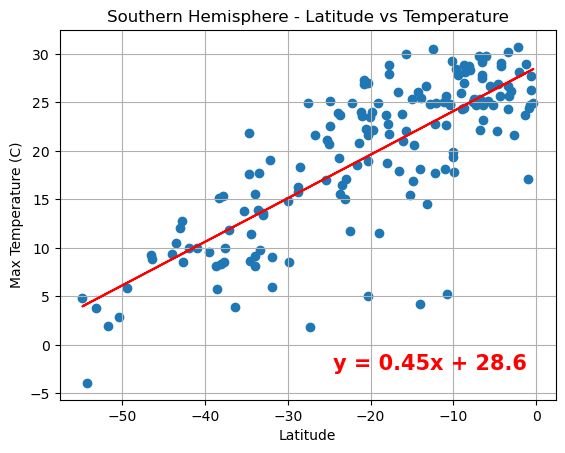

In [16]:
# Linear regression on Southern Hemisphere
x_south_temp = southern_hemi_df['Lat']
y_south_temp = southern_hemi_df['Max Temp']

fig_south_temp, ax_south_temp = plt.subplots()
ax_south_temp.scatter(x_south_temp, y_south_temp)
plt.title("Southern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

linreg_plot(ax_south_temp, x_south_temp, y_south_temp, 240, 60)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00010005963752437835


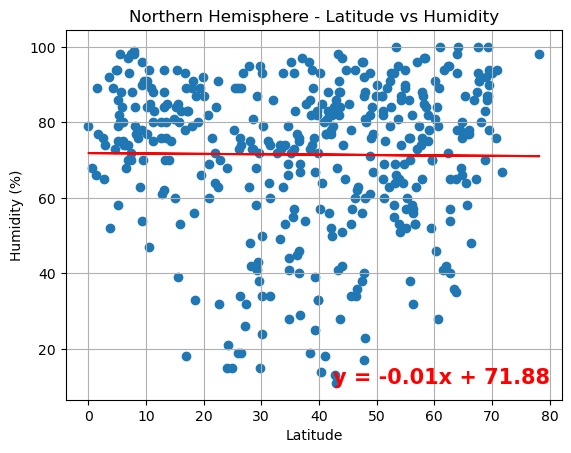

In [29]:
# Northern Hemisphere
x_north_humid = northern_hemi_df['Lat']
y_north_humid = northern_hemi_df['Humidity']

fig_north_humid, ax_north_humid = plt.subplots()
ax_north_humid.scatter(x_north_humid, y_north_humid)
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

linreg_plot(ax_north_humid, x_north_humid, y_north_humid, 240, 50)

The r-value is: 0.00034295978968175504


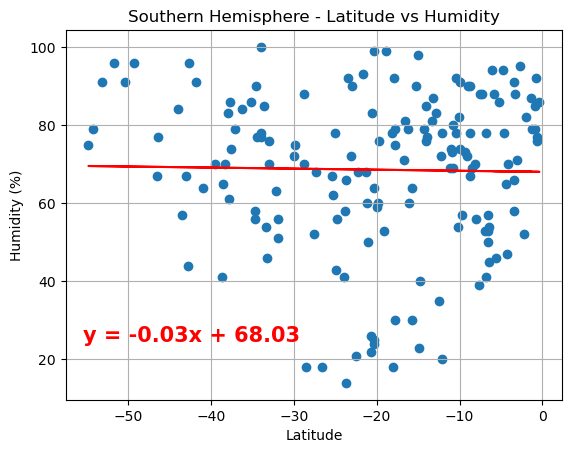

In [30]:
# Southern Hemisphere
x_south_humid = southern_hemi_df['Lat']
y_south_humid = southern_hemi_df['Humidity']

fig_south_humid, ax_south_humid = plt.subplots()
ax_south_humid.scatter(x_south_humid, y_south_humid)
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

linreg_plot(ax_south_humid, x_south_humid, y_south_humid, 60, 80)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 5.171946145729771e-05


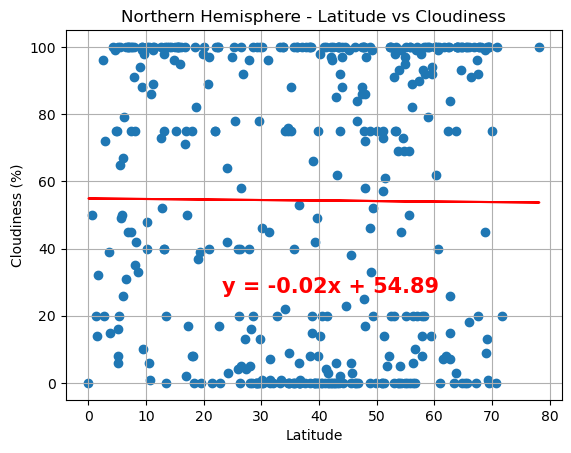

In [36]:
# Northern Hemisphere
x_north_cloud = northern_hemi_df['Lat']
y_north_cloud = northern_hemi_df['Cloudiness']

fig_north_cloud, ax_north_cloud = plt.subplots()
ax_north_cloud.scatter(x_north_cloud, y_north_cloud)
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

linreg_plot(ax_north_cloud, x_north_cloud, y_north_cloud, 160, 115)

The r-value is: 0.015684611803807053


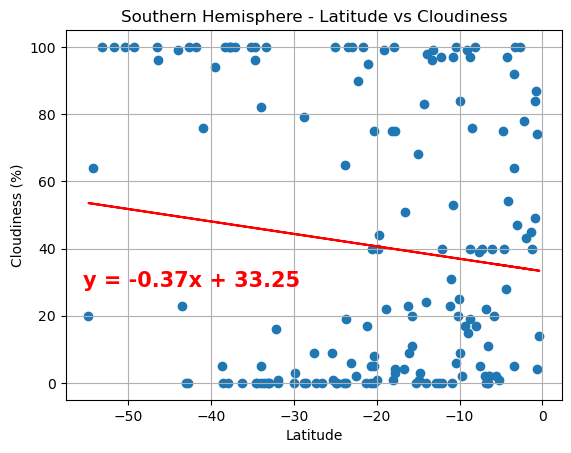

In [38]:
# Southern Hemisphere
x_south_cloud = southern_hemi_df['Lat']
y_south_cloud = southern_hemi_df['Cloudiness']

fig_south_cloud, ax_south_cloud = plt.subplots()
ax_south_cloud.scatter(x_south_cloud, y_south_cloud)
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

linreg_plot(ax_south_cloud, x_south_cloud, y_south_cloud, 60, 120)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00010512226821174048


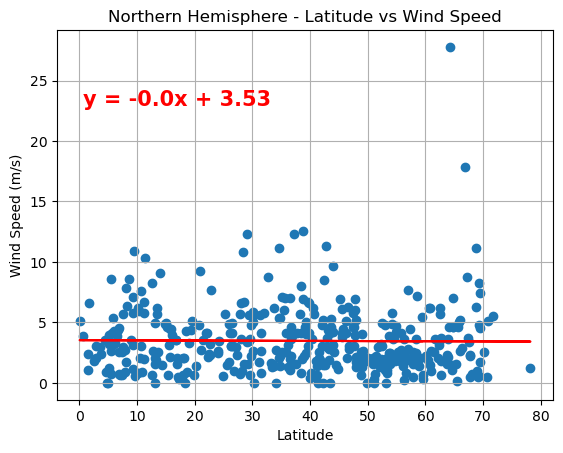

In [40]:
# Northern Hemisphere
x_north_wind = northern_hemi_df['Lat']
y_north_wind = northern_hemi_df['Wind Speed']

fig_north_wind, ax_north_wind = plt.subplots()
ax_north_wind.scatter(x_north_wind, y_north_wind)
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

linreg_plot(ax_north_wind, x_north_wind, y_north_wind, 60, 250)

The r-value is: 0.003843122086402693


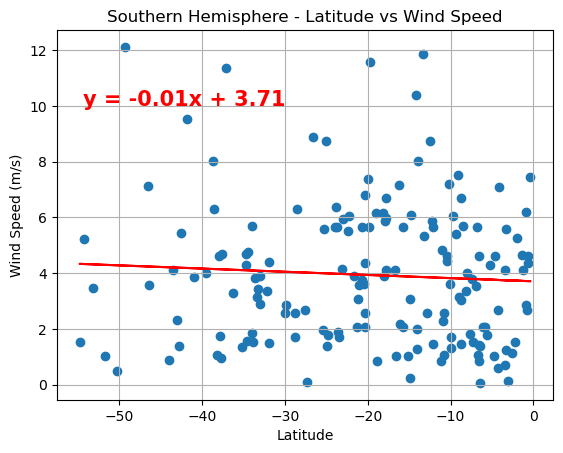

In [39]:
# Southern Hemisphere
x_south_wind = southern_hemi_df['Lat']
y_south_wind = southern_hemi_df['Wind Speed']

fig_south_wind, ax_south_wind = plt.subplots()
ax_south_wind.scatter(x_south_wind, y_south_wind)
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

linreg_plot(ax_south_wind, x_south_wind, y_south_wind, 60, 250)

**Discussion about the linear relationship:** YOUR RESPONSE HERE